In [34]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [2]:
DATA_PATH='../../'
COV='RmYN02'
BLAST_OUT=DATA_PATH+COV+'/Blastn/dataframes/'

In [3]:
RmYN02_2019_1_run0='BetaCoV_bat_Yunnan_RmYN02_2019_1_10000_95pct_hits_df.csv'
RmYN02_2019_2_run0='BetaCoV_bat_Yunnan_RmYN02_2019_2_10000_95pct_hits_df.csv'

RmYN02_2019_1_run1='BetaCoV_bat_Yunnan_RmYN02_2019_1_run1_10000_95pct_hits_df.csv'
RmYN02_2019_1_run2='BetaCoV_bat_Yunnan_RmYN02_2019_1_run2_10000_95pct_hits_df.csv'
RmYN02_2019_2_run1='BetaCoV_bat_Yunnan_RmYN02_2019_2_run1_10000_95pct_hits_df.csv'
RmYN02_2019_2_run2='BetaCoV_bat_Yunnan_RmYN02_2019_2_run2_10000_95pct_hits_df.csv'

In [6]:
df1=pd.read_csv(BLAST_OUT+RmYN02_2019_1_run0)
df2=pd.read_csv(BLAST_OUT+RmYN02_2019_2_run0)

In [37]:
df3=pd.read_csv(BLAST_OUT+RmYN02_2019_1_run1)
df4=pd.read_csv(BLAST_OUT+RmYN02_2019_1_run2)
df5=pd.read_csv(BLAST_OUT+RmYN02_2019_2_run1)
df6=pd.read_csv(BLAST_OUT+RmYN02_2019_2_run2)

In [38]:
frames = [df3, df4, df5, df6]
df = pd.concat(frames)

In [39]:
df.head()

,idx,title,accession,hit_id,length,query_length,text_title
0,7374120,gi|1238280724|gb|KY962518.1| Homo sapiens ext...,KY962518,gi|1238280724|gb|KY962518.1|,44838,150,Homo sapiens external transcribed spacer 18S r...
1,23940846,gi|1238280724|gb|KY962518.1| Homo sapiens ext...,KY962518,gi|1238280724|gb|KY962518.1|,44838,150,Homo sapiens external transcribed spacer 18S r...
2,4271560,gi|1238280724|gb|KY962518.1| Homo sapiens ext...,KY962518,gi|1238280724|gb|KY962518.1|,44838,150,Homo sapiens external transcribed spacer 18S r...
3,38786432,gi|1238280724|gb|KY962518.1| Homo sapiens ext...,KY962518,gi|1238280724|gb|KY962518.1|,44838,150,Homo sapiens external transcribed spacer 18S r...
4,1426756,gi|1238280724|gb|KY962518.1| Homo sapiens ext...,KY962518,gi|1238280724|gb|KY962518.1|,44838,150,Homo sapiens external transcribed spacer 18S r...


In [40]:
df.drop(columns=['accession','hit_id','length','query_length'],inplace=True)

In [41]:
frames = [df1, df2, df]
df = pd.concat(frames)

In [42]:
len(df)

3965

In [43]:
df

,idx,title,text_title
0,27345586,gi|1238280724|gb|KY962518.1| Homo sa...,Homo sapiens external transcribed spacer 18S ...
1,19432063,gi|1238280724|gb|KY962518.1| Homo sa...,Homo sapiens external transcribed spacer 18S ...
2,7063911,gi|1238280724|gb|KY962518.1| Homo sa...,Homo sapiens external transcribed spacer 18S ...
3,28566285,gi|1238280724|gb|KY962518.1| Homo sa...,Homo sapiens external transcribed spacer 18S ...
4,27104694,gi|1820933976|ref|XR_004381821.1| P...,PREDICTED: Lontra canadensis 2...
...,...,...,...
830,9406942,gi|1238280724|gb|KY962518.1| Homo sapiens ext...,Homo sapiens external transcribed spacer 18S r...
831,4969906,gi|1238280724|gb|KY962518.1| Homo sapiens ext...,Homo sapiens external transcribed spacer 18S r...
832,35198788,gi|1238280724|gb|KY962518.1| Homo sapiens ext...,Homo sapiens external transcribed spacer 18S r...
833,30494177,gi|1933279150|gb|MW201981.1| Bat coronavirus ...,Bat coronavirus strain BetaCoV/Rm/Yunnan/YN02/...


In [48]:
df.text_title = df.text_title.str.replace('              ', '')
df.text_title = df.text_title.str.strip()

In [49]:
titles=df.text_title.to_list()

In [50]:
titles.sort()

In [51]:
titles

['Aphantopus hyperantus genome assembly, chromosome: 25,',
 'Apibacter raozihei strain HY041 chromosome, complete genome ,',
 'Apibacter raozihei strain HY041 chromosome, complete genome ,',
 'Arthrobacter sp. ZXY-2, complete genome,',
 'Arthrobacter sp. strain JJ-1 16S ribosomal RNA gene, partial sequence ,',
 'Artificial DNA sequence synthesized ab initio by DNA polymerase of Thermus thermophilus, clone pTH262,',
 'Artificial DNA sequence synthesized ab initio by DNA polymerase of Thermus thermophilus, clone pTH262,',
 'Aspergillus flavus strain K49 chromosome 7 ,',
 'Aspergillus flavus strain K49 chromosome 7 ,',
 'Aspergillus flavus strain K49 chromosome 7,',
 'Aspergillus flavus strain K49 chromosome 7,',
 'Aspergillus salinicola strain UBOCC-A-118062 large subunit ribosomal RNA gene, partial sequence ,',
 'Atlantibacter hermannii strain 78-1320 chromosome, complete genome ,',
 'Aureobasidium namibiae CBS 147.97 ubiquitin-40S ribosomal protein S27a partial mRNA,',
 'Bacillus albus

In [52]:
human = [x for x in titles if x.startswith('Homo sapiens')]

In [53]:
print(f'Homo sapiens percantage: {(len(human)/len(titles))*100}')

Homo sapiens percantage: 77.22572509457756


In [54]:
human18s = [x for x in titles if x.startswith('Homo sapiens external transcribed spacer 18S')]
print(f'Homo sapiens external transcribed spacer 18S percantage: {(len(human18s)/len(titles))*100}')

Homo sapiens external transcribed spacer 18S percantage: 75.56116015132407


In [55]:
seqs, counts = np.unique(titles, return_counts=True)

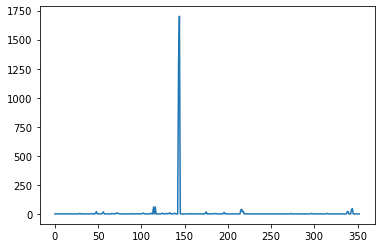

In [56]:
plt.plot(counts)

Dominated by Human RNA sequences

In [57]:
non_human = [x for x in titles if not x.startswith('Homo sapiens')]

In [58]:
seqs, counts = np.unique(non_human, return_counts=True)

Sort from most common (non human) to least

In [65]:
counts, seqs = zip(*sorted(zip(counts, seqs), reverse=True))

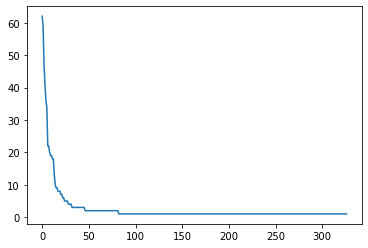

In [68]:
plt.plot(counts)

In [69]:
counts[:20]

(62, 59, 47, 41, 36, 34, 22, 22, 20, 19, 19, 18, 18, 13, 10, 9, 9, 8, 8, 8)

In [77]:
bats=['Rhinolophus','Hipposideros', 'Bat', 'Pipistrellus']

In [84]:
bat_r = [x for x in titles if 'rhinolophus' in x.lower()]
bat_b = [x for x in titles if 'bat coronavirus' in x.lower()]
bat_p = [x for x in titles if 'pipistrellus' in x.lower()]
bat_h = [x for x in titles if 'hipposideros' in x.lower()]

In [85]:
bat_tot=len(bat_r)+len(bat_b)+len(bat_p)+len(bat_h)

In [86]:
bat_tot

97

In [88]:
print(f'Bat percentage: {(bat_tot/len(titles))*100}')

Bat percentage: 2.44640605296343


In [71]:
carp=[x for x in titles if 'carpio' in x]

In [73]:
print(f'Carp percantage: {(len(carp)/len(titles))*100}')

Carp percantage: 2.8247162673392183


More carp than bats!

In [74]:
clonig_vectors=[x for x in titles if x.startswith('Cloning vector')]

In [75]:
clonig_vectors

['Cloning vector pAAV-EF1A-Gephyrin.FingR-GFP-CCR5TC, complete sequence,',
 'Cloning vector pCA-DEST2430, complete sequence ,',
 'Cloning vector pFosill-2, complete sequence ,',
 'Cloning vector pFosill-2, complete sequence ,',
 'Cloning vector pMSCV-syn-Gephyrin.FingR-GFP, complete sequence,']

In [89]:
len(clonig_vectors)

5

see
Zhuo et al. (2016) https://www.addgene.org/browse/article/22923/

In [67]:
seqs

('PREDICTED: Rhinolophus ferrumequinum patr class I histocompatibility antigen, A-126 alpha chain-like (LOC117017804), mRNA,',
 'PREDICTED: Rhinolophus ferrumequinum sorting nexin 8 (SNX8), mRNA,',
 'Cyprinus carpio genome assembly common carp genome ,scaffold 000000549,',
 'Bat coronavirus RaTG13, complete genome ,',
 'Cyprinus carpio genome assembly common carp genome ,scaffold 000001762,',
 'Bacillus pseudomycoides strain BTZ, complete sequence,',
 'PREDICTED: Canis lupus familiaris 28S ribosomal RNA (LOC119880519), rRNA,',
 'Bat coronavirus RacCS271, partial genome,',
 'Methylobacterium sp. XJLW chromosome, complete genome,',
 'PREDICTED: Papio anubis 28S ribosomal RNA (LOC116273624), rRNA ,',
 'Cyprinus carpio genome assembly common carp genome ,scaffold 000001762 ,',
 'Cyprinus carpio genome assembly common carp genome ,scaffold 000001344,',
 'Bat coronavirus RacCS271, partial genome ,',
 'Enterobacter hormaechei strain Y233 chromosome, complete genome,',
 'PREDICTED: Papio anubi